In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google_geocoding import API_KEY
%matplotlib inline

In [4]:
address = '390 QUEEN ST W'

params = {
    'key':API_KEY,
    'address':address
}

base_url = "https://maps.googleapis.com/maps/api/geocode/json?"

response = requests.get(base_url, params=params)
response.json()

{'results': [{'address_components': [{'long_name': '390',
     'short_name': '390',
     'types': ['street_number']},
    {'long_name': 'Queen Street West',
     'short_name': 'Queen St W',
     'types': ['route']},
    {'long_name': 'Old Toronto',
     'short_name': 'Old Toronto',
     'types': ['political', 'sublocality', 'sublocality_level_1']},
    {'long_name': 'Toronto',
     'short_name': 'Toronto',
     'types': ['locality', 'political']},
    {'long_name': 'Toronto Division',
     'short_name': 'Toronto Division',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'Ontario',
     'short_name': 'ON',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'Canada',
     'short_name': 'CA',
     'types': ['country', 'political']},
    {'long_name': 'M5V 2A6',
     'short_name': 'M5V 2A6',
     'types': ['postal_code']}],
   'formatted_address': '390 Queen St W, Toronto, ON M5V 2A6, Canada',
   'geometry': {'location': {'lat': 43

In [9]:
response = response.json()


In [12]:
if response['status'] =='OK':
    geometry = response['results'][0]['geometry']['location']

In [13]:
geometry

{'lat': 43.6487577, 'lng': -79.39691289999999}

In [3]:
df1 = pd.read_excel("C:\\Users\\stefy\\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\Parking Tickets 2019 - Delimited\\Delimited parking tickets df0 - df4.xlsx")
df2 = pd.read_excel("C:\\Users\\stefy\\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\Parking Tickets 2019 - Delimited\\Delimited parking tickets df5 - df8.xlsx")

In [4]:
df = pd.concat([df1,df2], axis=0, ignore_index=True)

In [5]:
df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,formatted_date,day_of_week,day_name
0,***94407,20190204,9,STOP-SIGNED HWY-PROHIBIT TM/DY,60,1038.0,NR,1 CHARLOTTE ST,NaN,NaN,ON,2019,2,4,2019-02-04,0,Monday
1,***08287,20190102,134,PARK-SIGNED HWY-PUBLIC LANE,40,205.0,R/O,11 CHARLOTTE ST,NaN,NaN,QC,2019,1,2,2019-01-02,2,Wednesday
2,***81446,20190103,9,STOP-SIGNED HWY-PROHIBIT TM/DY,60,2059.0,NR,11 CHARLOTTE ST,NaN,NaN,ON,2019,1,3,2019-01-03,3,Thursday
3,***66252,20190104,9,STOP-SIGNED HWY-PROHIBIT TM/DY,60,1127.0,NR,11 CHARLOTTE ST,NaN,NaN,ON,2019,1,4,2019-01-04,4,Friday
4,***05739,20190108,9,STOP-SIGNED HWY-PROHIBIT TM/DY,60,1233.0,NR,11 CHARLOTTE ST,NaN,NaN,ON,2019,1,8,2019-01-08,1,Tuesday


In [6]:
df.shape

(530324, 17)

In [8]:
df = df[df['time_of_infraction'].isna()==False]

In [9]:
df['year'] = df['date_of_infraction'].apply(lambda x: int(str(x)[0:4]))
df['month'] = df['date_of_infraction'].apply(lambda x: int(str(x)[4:6]))
df['day'] = df['date_of_infraction'].apply(lambda x: int(str(x)[6:8]))

<ipython-input-9-7f8fa5b4cca2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_of_infraction'].apply(lambda x: int(str(x)[0:4]))
<ipython-input-9-7f8fa5b4cca2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date_of_infraction'].apply(lambda x: int(str(x)[4:6]))
<ipython-input-9-7f8fa5b4cca2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [10]:
unique_codes = df['infraction_code'].unique()
descriptions=[]
for code in unique_codes:
    descriptions.append(df[df['infraction_code']==code]['infraction_description'].iloc[0])

In [11]:
codes_descriptions = pd.DataFrame(unique_codes, columns=["codes"])
codes_descriptions['descriptions']=descriptions
codes_descriptions

,codes,descriptions
0,3,PARK ON PRIVATE PROPERTY
1,29,PARK PROHIBITED TIME NO PERMIT
2,5,PARK-SIGNED HWY-PROHIBIT DY/TM
3,14,PARK-OBSTRUCT (DRWAY/LANEWAY)
4,9,STOP-SIGNED HWY-PROHIBIT TM/DY
...,...,...
171,41,PARALLEL PARK-METERED SPACE-RE
172,266,PARK VEHICLE PROHIBITED TIME
173,261,PARK MTR REC VE NOT DESIG AREA
174,411,PARK UNAUTH. VEH IN E-VEH. STN


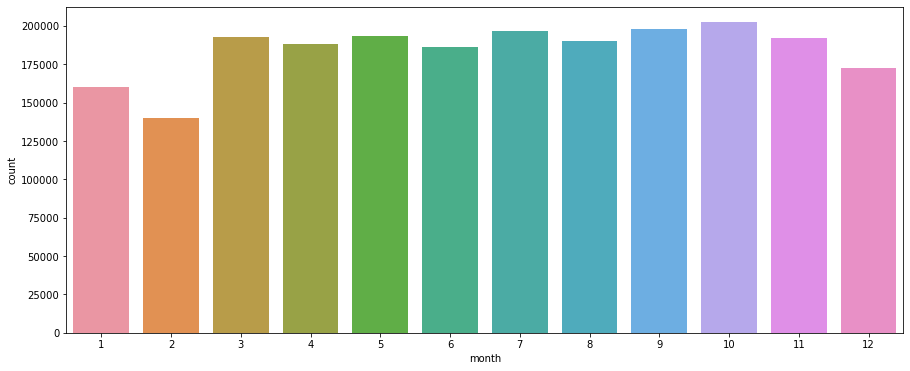

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='month', data=df)
plt.show()

In [13]:
def get_hour(x):
    x= int(x)
    x = str(int(x))
    hour=0
    min=0
    if len(x)==1:
        min=x
    if len(x)==2:
        min=x
    if len(x)==3:
        hour=x[0]
        min = x[1:]
    if len(x)==4:
        hour=x[0:2]
        min=x[2:]
    if int(min)>60 or int(hour)>24:
     
        hour=-1
    return int(hour) 

get_hour(79)

-1

In [14]:
def get_minute(x):
    x= int(x)
    x = str(int(x))
    hour=0
    min=0
    if len(x)==1:
        min=x
    if len(x)==2:
        min=x
    if len(x)==3:
        hour=x[0]
        min = x[1:]
    if len(x)==4:
        hour=x[0:2]
        min=x[2:]
    if int(min)>60 or int(hour)>24:
   
        min=-1
    return int(min) 
get_minute(352)

52

In [40]:
df['minute']=df['time_of_infraction'].apply(get_minute)
df['hour']=df['time_of_infraction'].apply(get_hour)
df = df[df['hour']!=-1]
df['formatted_date'] = pd.to_datetime(df[['year','month','day']])

In [41]:
df['day_of_week'] = df['formatted_date'].dt.dayofweek
df['day_name'] = df['formatted_date'].dt.day_name()

In [42]:
df['hour'].min(), df['hour'].max()

(0, 24)

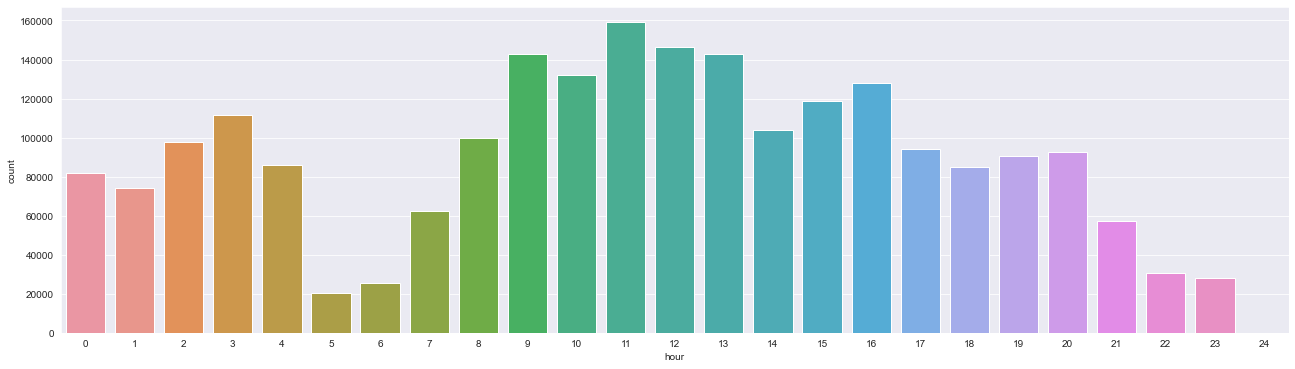

In [43]:
plt.figure(figsize=(22,6))
sns.countplot(x='hour', data=df)
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix

In [ ]:
df.head(3)

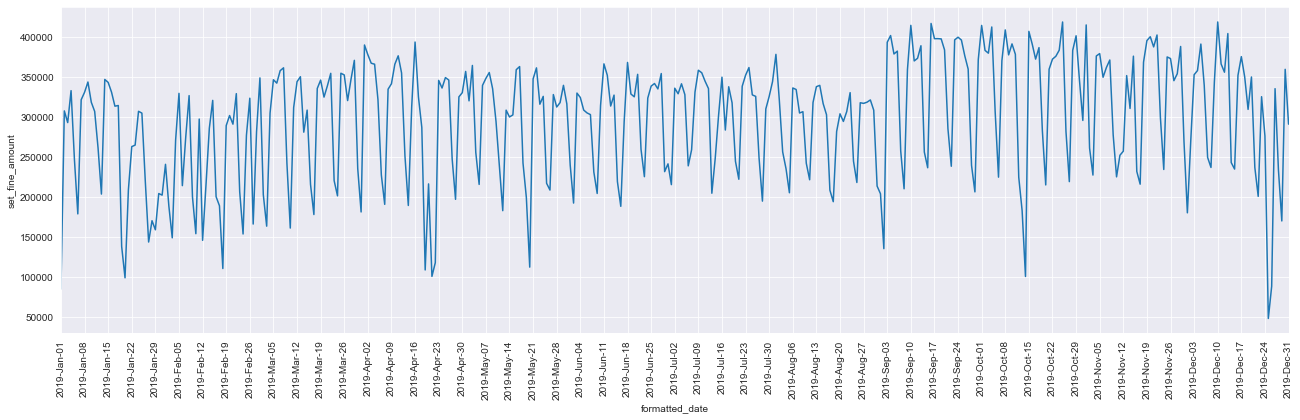

In [46]:
fig, ax = plt.subplots(figsize=(22, 6)) 
sns.lineplot(x='formatted_date',y='set_fine_amount', data=df.groupby('formatted_date').sum())
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
ax.set_xlim(['2019-01-01','2019-12-31'])

plt.show()


In [47]:
aug_sept= df.groupby('formatted_date').sum().loc['2019-8-1':'2019-9-30']
aug_sept

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,hour,dummy,day_of_week
formatted_date,,,,,,,,,,,
2019-08-01,158437215447,700384,378520,8918078.0,15843093,62776,7847,228278,86898,7847,23541
2019-08-02,133622727636,642386,321770,7450739.0,13361742,52944,13236,193939,72568,6618,26472
2019-08-03,117046084991,549312,256675,6546606.0,11704143,46376,17391,169406,63772,5797,28985
2019-08-04,96653378748,423464,235575,5199222.0,9664953,38296,19148,138522,50607,4787,28722
2019-08-05,79935396995,327496,205665,3918254.0,7993221,31672,19795,111254,38070,3959,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,146707268316,593981,376625,8824630.0,14670054,65394,188916,214430,86102,7266,21798
2019-09-27,142790235744,608546,360105,8238714.0,14278368,63648,190944,204714,80340,7072,28288
2019-09-28,101802658976,397918,239900,5547564.0,10179798,45378,141176,148964,53986,5042,25210


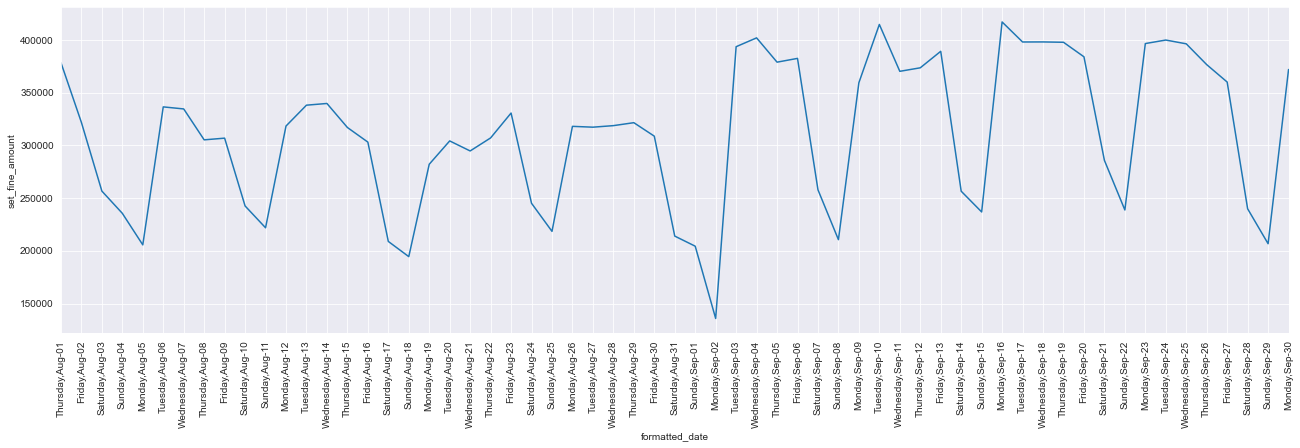

In [48]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(22, 6)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=aug_sept)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A,%b-%d'))
ax.set_xlim(['2019-08-01','2019-09-30'])

plt.show()


In [49]:
codes = df["infraction_code"].unique()
descriptions = list()
for code in list(codes):
    description = df[df['infraction_code']==code]['infraction_description'].iloc[0]
    descriptions.append(description)

codes_descriptions = pd.DataFrame()
codes_descriptions['codes']=codes
codes_descriptions['descriptions']=descriptions


In [50]:
for index, row in codes_descriptions.iterrows():
    print(str(row['codes'])+"  ----  "+row['descriptions'])

3  ----  PARK ON PRIVATE PROPERTY
29  ----  PARK PROHIBITED TIME NO PERMIT
5  ----  PARK-SIGNED HWY-PROHIBIT DY/TM
14  ----  PARK-OBSTRUCT (DRWAY/LANEWAY)
9  ----  STOP-SIGNED HWY-PROHIBIT TM/DY
337  ----  PARK - ON BOULEVARD
404  ----  STOP-9 M PEDESTRIAN X BEYOND
406  ----  PARK-VEH. W/O VALID ONT PLATE
15  ----  PARK-WITHIN 3M OF FIRE HYDRANT
384  ----  STOP VEH OTR THN BCYCL-BYCL LN
192  ----  STAND SIGNED TRANSIT STOP
8  ----  STAND VEH.-PROHIBIT TIME/DAY
415  ----  PARK COMMERC LOAD ZONE NOT LDG
414  ----  PARK VEH.-COMMERCIAL LOAD ZONE
30  ----  STOP-(ON/OVER) (SIDEWK/FTPATH)
134  ----  PARK-SIGNED HWY-PUBLIC LANE
355  ----  PARK IN ACCESSIBLE NO PERMIT
28  ----  PARK-N.YORK 2AM-6AM DEC1-MAR31
320  ----  PARK NON-BUS-BUS PK ZNE DY/TM
347  ----  PARK IN A FIRE ROUTE
37  ----  PARK HEAVY (TRUCK/VEH.) TM/DY
2  ----  PARK - LONGER THAN 3 HOURS
16  ----  PARK-WITHIN 9M INTERSECT ROAD
77  ----  PARK-(FRNT/60 CM) DRWAY/LANEWY
336  ----  PARK-FAIL TO DISPLAY PERMIT
419  ----  STAND NON-

In [51]:
df['dummy']=df['infraction_code'].apply(lambda x: 1)
aug_sept_codes= df.groupby('infraction_code').sum().sort_values(ascending=False, by='set_fine_amount')
aug_sept_codes.head(20)

,date_of_infraction,set_fine_amount,time_of_infraction,year,month,day,minute,hour,dummy,day_of_week
infraction_code,,,,,,,,,,
5,6754876112589,16727650,434994483.0,675464526,2256740,5178589,9739483,4252550,334554,903837
3,9182984027345,13643610,448857790.0,918267447,3024430,7114345,13298990,4355588,454813,1284217
403,1368040272090,10163310,99169287.0,136799364,455532,1078890,1767087,974022,67756,139420
207,5786185385635,8597310,437017831.0,578598963,1912637,4491935,8369831,4286480,286577,833060
29,5665611619786,8418150,202032740.0,566541495,1921943,4475486,8358740,1936740,280605,846545
9,2135951488142,7800340,142682537.0,213587991,699117,1666442,3116637,1395659,105789,272860
8,1390955680187,5047900,87556410.0,139090929,453096,1080587,1988610,855678,68891,186957
406,2091205759800,4142930,125621033.0,209113887,655516,1338200,3055433,1225656,103573,295776
347,274774836339,3402250,19481777.0,27476571,89124,213939,397777,190840,13609,42476


In [52]:
code_5 = df[df['infraction_code']==5]
code_5.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,formatted_date,dummy,day_of_week,day_name
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,2,0,2019-01-01,1,1,Tuesday
7,***03707,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,3.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,3,0,2019-01-01,1,1,Tuesday
12,***03708,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,4.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,4,0,2019-01-01,1,1,Tuesday
15,***03709,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,5.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,5,0,2019-01-01,1,1,Tuesday
36,***39949,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,11.0,OPP,7 PARK VISTA,NaN,NaN,ON,2019,1,1,11,0,2019-01-01,1,1,Tuesday


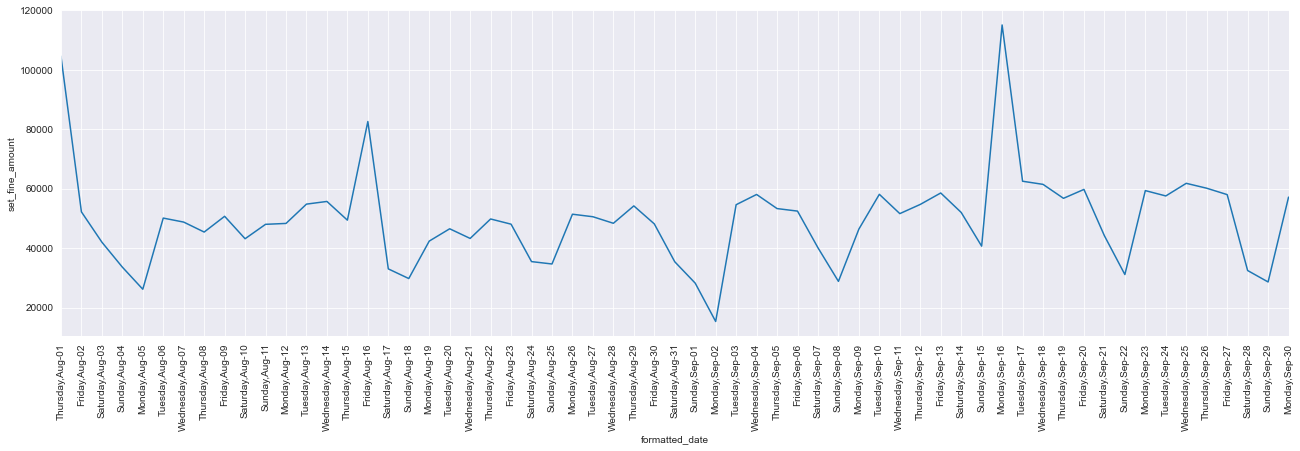

In [53]:
code_5_bydate = code_5.groupby('formatted_date').sum().loc['2019-8-1':'2019-9-30']

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(22, 6)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=code_5_bydate)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A,%b-%d'))
ax.set_xlim(['2019-08-01','2019-09-30'])

plt.show()


In [54]:
top_3 = df[(df['infraction_code']==5) | (df['infraction_code']==3) | (df['infraction_code']==403)]
top_3_delimited = top_3.sort_values(ascending=True, by="formatted_date").set_index("formatted_date").loc['2019-8-28':'2019-9-22']
top_3_delimited


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,dummy,day_of_week,day_name
formatted_date,,,,,,,,,,,,,,,,,,,
2019-08-28,***12940,20190828,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1506.0,OPP,154 PEARL ST,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***98603,20190828,3,PARK ON PRIVATE PROPERTY,30,1506.0,NaN,4700 KEELE ST,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***17315,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1506.0,NR,437 QUEEN ST W,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***16999,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1506.0,NR,842 KING ST W,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***92160,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1507.0,NR,33 COLLEGE ST,NaN,NaN,ON,2019,8,28,7,15,1,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-22,***35030,20190922,3,PARK ON PRIVATE PROPERTY,30,813.0,NaN,15 TOBERMORY DR,NaN,NaN,ON,2019,9,22,13,8,1,6,Sunday
2019-09-22,***02393,20190922,3,PARK ON PRIVATE PROPERTY,30,815.0,NaN,101 HUMBER BLVD,NaN,NaN,ON,2019,9,22,15,8,1,6,Sunday
2019-09-22,***02394,20190922,3,PARK ON PRIVATE PROPERTY,30,815.0,NaN,101 HUMBER BLVD,NaN,NaN,ON,2019,9,22,15,8,1,6,Sunday


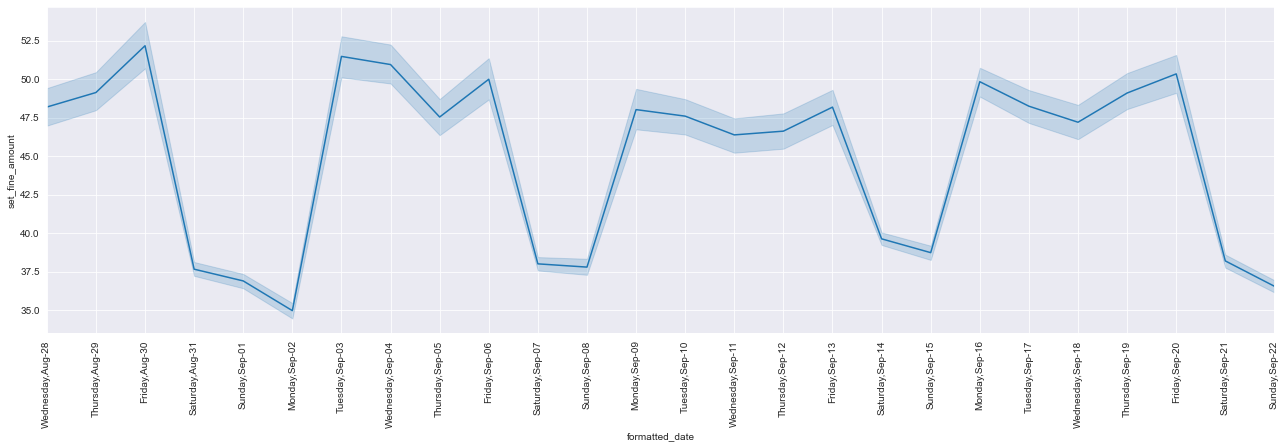

In [55]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(22, 6)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=top_3_delimited)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A,%b-%d'))
ax.set_xlim(['2019-08-28','2019-09-22'])

plt.show()

Most infractions on Mondays and Tuesdays are of code 5: PARK-SIGNED HWY-PROHIBIT DY/TM and 3: PARK ON PRIVATE PROPERTY

In [56]:
df[df['formatted_date']=='2019-09-16']['infraction_code'].value_counts().head()

5      2302
3      1494
207     890
29      694
2       483
Name: infraction_code, dtype: int64

The least number of infractios is often on sSundays. Most of these infractions have code 3: PARK ON PRIVATE PROPERTY and 207: PARK MACHINE-REQD FEE NOT PAID  

In [57]:
df[df['formatted_date']=='2019-09-15']['infraction_code'].value_counts().head(20)

3      1050
207     864
5       813
29      791
2       412
406     204
9       153
8       145
6       115
15       76
192      47
90       43
347      39
415      23
336      20
30       19
16       18
134      17
48       16
419      15
Name: infraction_code, dtype: int64

In [58]:
by_dayofweek = df.groupby('day_of_week').sum().sort_values(by="day_of_week", ascending=True)
by_dayofweek


,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,hour,dummy
day_of_week,,,,,,,,,,
0,6319826825468,29273981,15693240,364548754.0,631961133,2106121,4883368,9114354,3554344,313007
1,7288535494318,33186469,17913870,419806870.0,728828715,2427751,5569218,10584670,4092222,360985
2,6997602242608,31417420,17090840,403116077.0,699736944,2274744,5328208,10173877,3929422,346576
3,6932062087051,31814038,17122110,409118278.0,693183270,2239854,5401651,10066978,3990513,343330
4,7098962351326,32717780,17738215,411798976.0,709872324,2336798,5431526,10314876,4014841,351596
5,5541736262158,24488754,12416560,305268992.0,554154930,1826391,4323058,7998692,2972703,274470
6,4482678994808,18234972,10369330,243530791.0,448252323,1523121,3452708,6433191,2370976,222017


# Number of infractions per day of week all year

<AxesSubplot:ylabel='dummy'>

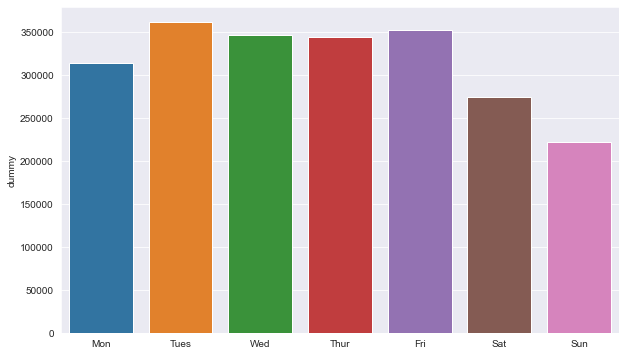

In [59]:
plt.figure(figsize=(10,6))
daysofweek = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
sns.barplot(x=daysofweek, y="dummy", data=by_dayofweek)

# Fine amount charged per day of week all year

<AxesSubplot:ylabel='set_fine_amount'>

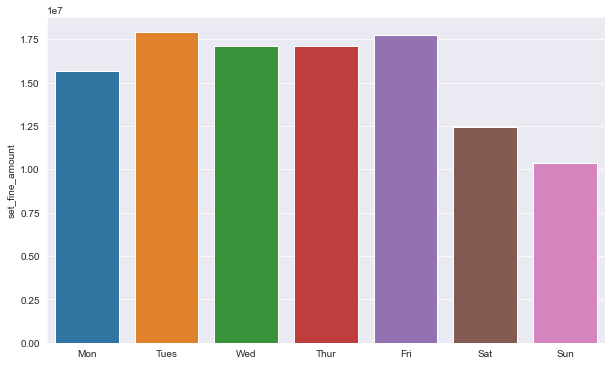

In [60]:
plt.figure(figsize=(10,6))
daysofweek = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
sns.barplot(x=daysofweek, y="set_fine_amount", data=by_dayofweek)

In [61]:

df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,formatted_date,dummy,day_of_week,day_name
0,***29025,20190101,3,PARK ON PRIVATE PROPERTY,30,0.0,AT,2110 KEELE ST,NaN,NaN,ON,2019,1,1,0,0,2019-01-01,1,1,Tuesday
1,***32896,20190101,3,PARK ON PRIVATE PROPERTY,30,1.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON,2019,1,1,1,0,2019-01-01,1,1,Tuesday
2,***41781,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,S/O,HAZELWOOD AVE,W/O,JONES AVE,ON,2019,1,1,1,0,2019-01-01,1,1,Tuesday
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,2,0,2019-01-01,1,1,Tuesday
4,***69805,20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50,3.0,R/O,1801 EGLINTON AVE W,NaN,NaN,ON,2019,1,1,3,0,2019-01-01,1,1,Tuesday


In [62]:
df.groupby('hour').sum()

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,dummy,day_of_week
hour,,,,,,,,,,
0,1652628173738,4610890,3254645,2427435.0,165257169,551891,1294638,2427435,81851,273594
1,1497483100454,3799477,2847130,9531289.0,149743173,502088,1161654,2114589,74167,237063
2,1973195394659,3244286,3607560,22486101.0,197312832,655526,1522059,2940501,97728,301452
3,2250979164964,2600475,3391380,36739201.0,225090234,750649,1760064,3293401,111486,335714
4,1738437856107,2047679,2472870,36661739.0,173837919,573185,1347607,2221339,86101,266330
5,414877601505,407962,604710,10688175.0,41486412,131600,321505,414175,20548,66196
6,513651208604,1533434,956400,16352267.0,51363360,172109,397704,1088267,25440,71004
7,1257011678877,7350028,3763145,45452140.0,125696883,418876,961277,1872240,62257,163696
8,2013597004790,10399386,4564570,82753982.0,201352851,669366,1558190,2970782,99729,270992


In [64]:
addresses = df['location2']
addresses

0                2110 KEELE ST
1          125 QUEENS WHARF RD
2                HAZELWOOD AVE
3               10 CARABOB CRT
4          1801 EGLINTON AVE W
                  ...         
2213933           4700 JANE ST
2213934    61 BISHOP TUTU BLVD
2213935         735 COLLEGE ST
2213936    61 BISHOP TUTU BLVD
2213937     320 ASSINIBOINE RD
Name: location2, Length: 2211981, dtype: object

In [65]:
get_street_name(address):
    address = str(address)
    valid_char=""
    address.find()
    for char in address:
        if char.isdigit():
            x=1
            valid_char += char




SyntaxError: invalid syntax (<ipython-input-65-b885cd824e54>, line 1)